# Implementação do Gradiente Descendente 


## O que é? 
Gradiente Descendente é um algoritmo interativo usado para minimizar uma função encontrando os melhores parâmetros.

## Algoritmo do Gradiente Descendente
Os passos devem ser feitos em proporção ao negativo do gradiente da função (afastando-se do gradiente) no ponto atual para encontrar mínimos locais

```
repeat until convergence
{
    w = w - (learning_rate * (dJ/dw))
    b = b - (learning_rate * (dJ/db))
}
```


### Explorando os Dados

In [60]:
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
# Converter Sim para 1 e Não para 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [62]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [63]:
# Convertendo coluna furnishingstatus para uma coluna binário usando get_dummies
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
housing = pd.concat([housing, status], axis=1)
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [64]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [65]:
# Normalizando os dados 
housing = (housing - housing.mean())/housing.std()

In [66]:
# Regressão linear simples

X = housing['area']
y = housing['price']

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\bruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


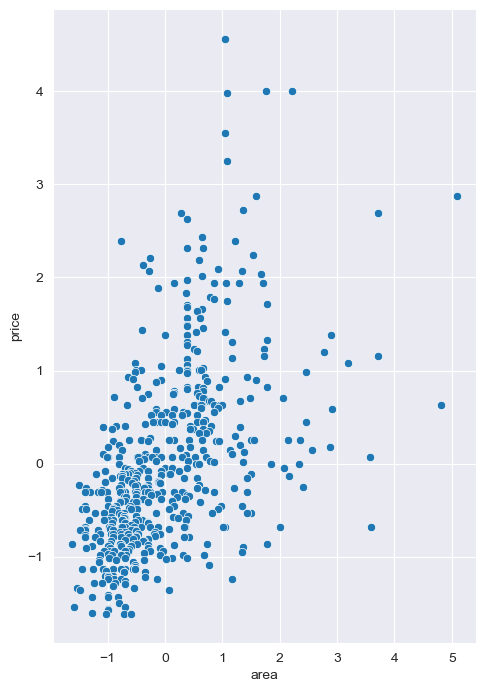

In [69]:
#Visualize a relação entre as características e a resposta usando gráficos de dispersão
sns.pairplot(housing, x_vars='area', y_vars='price', height=7, aspect=0.7, kind='scatter')

In [71]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [73]:
def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return gd_df

In [75]:
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
...,...,...,...
995,0.535997,2.630312e-16,0.711399
996,0.535997,2.560398e-16,0.711399
997,0.535997,2.557220e-16,0.711399
998,0.535997,2.522997e-16,0.711399


<Axes: xlabel='index'>

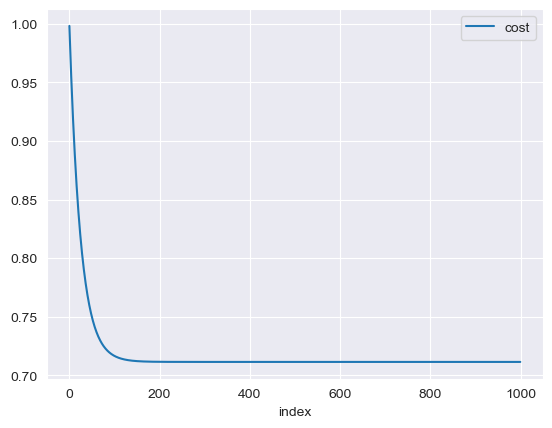

In [77]:
gradients.reset_index().plot.line(x='index', y=['cost'])

## Regressão Múltipla: Aplicando Descida do Gradiente para Múltiplos (>1) Atributos

In [103]:
X = housing[['area','bedrooms']]
y = housing['price']
X

,area,bedrooms
0,1.045766,1.402131
1,1.755397,1.402131
2,2.216196,0.047235
3,1.082630,1.402131
4,1.045766,1.402131
...,...,...
540,-0.990968,-1.307661
541,-1.267448,0.047235
542,-0.705273,-1.307661
543,-1.032440,0.047235


In [108]:
X['intercept'] = 1
X = X[['intercept', 'area', 'bedrooms']]
X

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131
...,...,...,...
540,1,-0.990968,-1.307661
541,1,-1.267448,0.047235
542,1,-0.705273,-1.307661
543,1,-1.032440,0.047235


In [109]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [112]:
# Theta é o vetor que representa os coeficientes
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iterations = 1000

In [113]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [114]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [116]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[3.50382312358765e-18, 0.005350138644096792, 0...",0.494906
1,"[5.137582510283752e-18, 0.010641328951860771, ...",0.490824
2,"[7.296915365518001e-18, 0.015874226967184046, ...",0.486834
3,"[9.179201741212763e-18, 0.021049481374934613, ...",0.482935
4,"[1.0776293211499227e-17, 0.02616773358401025, ...",0.479124
...,...,...
995,"[3.294938226440748e-16, 0.49165587415756895, 0...",0.314176
996,"[3.299012439375152e-16, 0.4916560967244127, 0....",0.314176
997,"[3.303412589344309e-16, 0.4916563172711538, 0....",0.314176
998,"[3.307609028666745e-16, 0.49165653581645646, 0...",0.314176


<Axes: xlabel='index'>

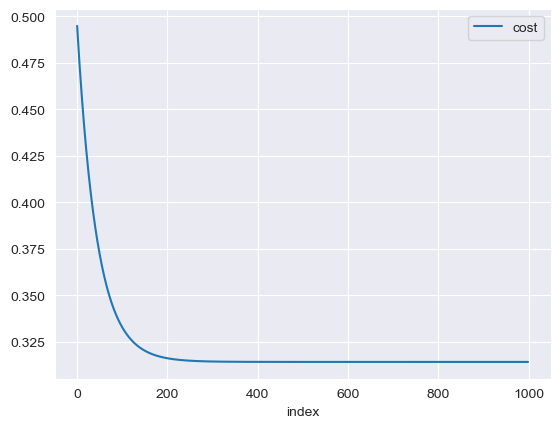

In [118]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])